# Making a simple image recognition Neural Net with Keras and the MNIST datasset

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_images)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(28, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(20, activation='sigmoid'))
network.add(layers.Dense(10, activation='softmax'))


In [9]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy',
                metrics=['accuracy'])


In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [11]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 1.0033 - accuracy: 0.7905
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.3574 - accuracy: 0.9129
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2553 - accuracy: 0.9303
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2125 - accuracy: 0.9400
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1860 - accuracy: 0.9463


In [13]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1803 - accuracy: 0.9494


In [14]:
print('test_acc:', test_acc)

test_acc: 0.949400007724762


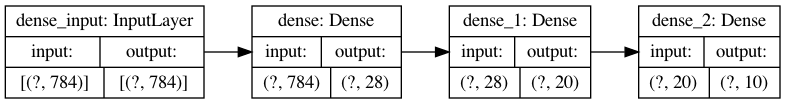

In [17]:
from keras.utils import plot_model

plot_model(network, show_shapes=True, rankdir='LR', to_file='model.png')